In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

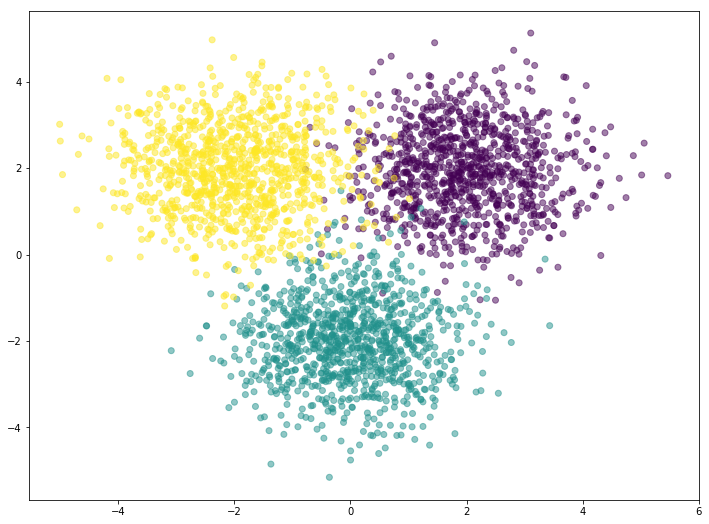

In [2]:
# Simulate data

D = 2
K = 3
N = K * 1000

X0 = np.random.randn((N//K), D) + np.array([2, 2])
X1 = np.random.randn((N//K), D) + np.array([0, -2])
X2 = np.random.randn((N//K), D) + np.array([-2, 2])
X = np.vstack((X0, X1, X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure(figsize = (12,9))
plt.scatter(X[:,0], X[:,1], c=y, alpha = 0.5)

In [3]:
# Functions

def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis=1, keepdims=True)

def feed_forward(X, W1, b1, W2, b2):
    Z1 = np.tanh(np.matmul(X, W1) + b1)
    P = softmax(np.matmul(Z1, W2) + b2)
    return Z1, P

def cross_entropy(Y, P):
    return -(1/len(Y))*np.sum(Y*np.log(P))

def classification_rate(y, P):
    return np.mean(y == P.argmax(axis = 1))

In [6]:
# Data prep

Y = np.zeros((N, K))

for i in xrange(N):
    Y[i, y[i]] = 1

In [31]:
# Build the model

Q = 4

W1 = np.random.randn(D, Q)
b1 = np.random.randn(Q)
W2 = np.random.randn(Q, K)
b2 = np.random.randn(K)

In [2]:
# Train the model

J = []
eta = 1e-3
epochs = int(5e4)

for t in xrange(epochs):
    Z1, P = feed_forward(X, W1, b1, W2, b2)
    J.append(cross_entropy(Y, P))
    
    W2 -= eta * (1/N)*np.matmul(Z1.T, P-Y)
    b2 -= eta * ((1/N)*np.matmul(Z1.T, P-Y)).sum(axis = 0)
    W1 -= eta * (1/N)*np.matmul(X.T, np.matmul(P-Y, W2.T)*(1 - Z1*Z1))
    b1 -= eta * ((1/N)*np.matmul(X.T, np.matmul(P-Y, W2.T)*(1 - Z1*Z1))).sum(axis = 0)
    
plt.figure(figsize = (12,9))
plt.plot(J)

NameError: name 'feed_forward' is not defined

In [33]:
# Report Classication Rate

print("Classification Rate: {}".format(classification_rate(y, P)))

Classification Rate: 0.974


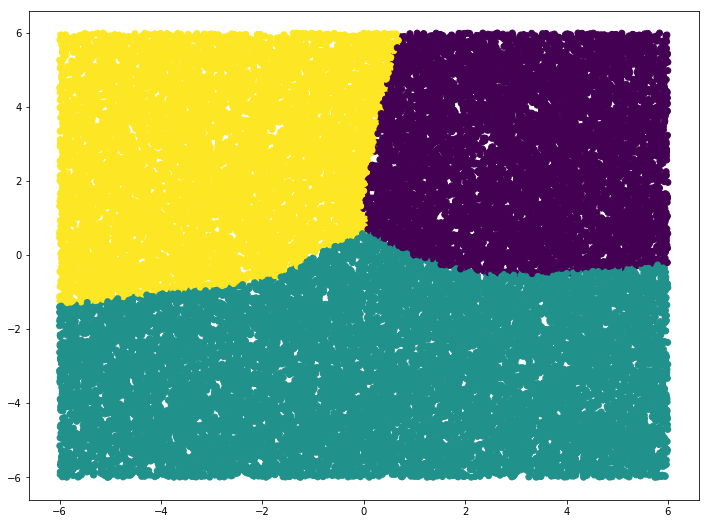

In [34]:
# Visualize learned decision boundary

X_vis = np.random.uniform(-6, 6, (N*10, D))
P_vis = feed_forward(X_vis, W1, b1, W2, b2)[-1]

plt.figure(figsize = (12,9))
plt.scatter(X_vis[:,0], X_vis[:,1], c = P_vis.argmax(axis = 1))